In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats


In [113]:
df = pd.read_csv("./../churn_data.csv")

df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000,4951.000000,4950,4950,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4293,NaN,4481,3638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100.238295,NaN,NaN,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,NaN,39.718817,NaN,NaN,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,73.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,NaN,100.000000,NaN,NaN,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,NaN,127.000000,NaN,NaN,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000


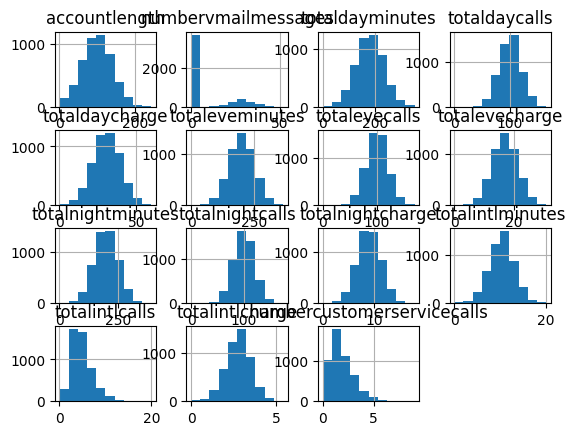

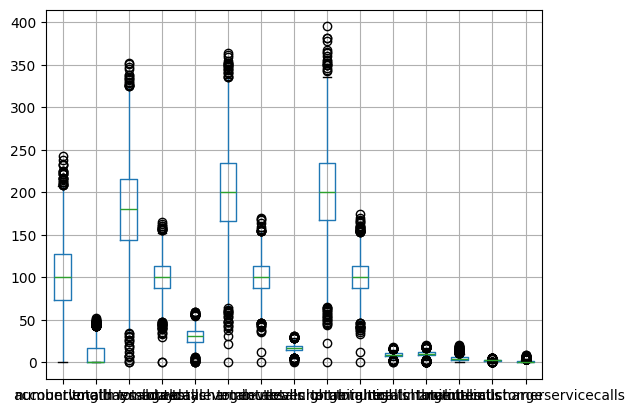

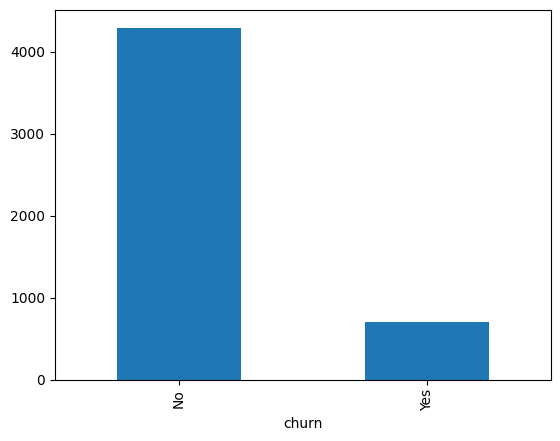

churn
No     4293
Yes     707
Name: count, dtype: int64

In [114]:
df.hist()
plt.show()

df.boxplot()
plt.show()

df['churn'].value_counts().plot.bar()
plt.show()

df['churn'].value_counts()

In [115]:
# sns.set(style="ticks")
# sns.pairplot(df, hue="churn", markers=["o", "s"])

# plt.legend(title="Churn", loc="upper right")

# plt.show()


# Handling missing data

In [116]:
mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}\ntotal number of rows: {len(df)}")

rows with missing values: 793
total number of rows: 5000


In [117]:

#data imputation
numerical_cols = df.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)


categorical_cols = df.select_dtypes(exclude='number')
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}\ntotal number of rows: {len(df)}")

#dropping missing values
#df = df.dropna()

df.describe()

rows with missing values: 0
total number of rows: 5000


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.238295,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,39.523676,13.484979,53.656260,19.745037,9.103012,50.233317,19.737924,4.278942,50.245113,19.839483,2.265397,2.749856,2.436181,0.740819,1.298735
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,144.075000,87.000000,24.495000,166.900000,87.000000,14.177500,167.375000,87.000000,7.520000,8.500000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.306625,100.000000,30.629386,200.679798,100.243838,17.048293,200.465697,100.000000,9.015240,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,215.900000,113.000000,36.690000,233.800000,113.000000,19.862500,234.025000,113.000000,10.520000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Index(['churn', 'internationalplan', 'voicemailplan'], dtype='object')


<Axes: >

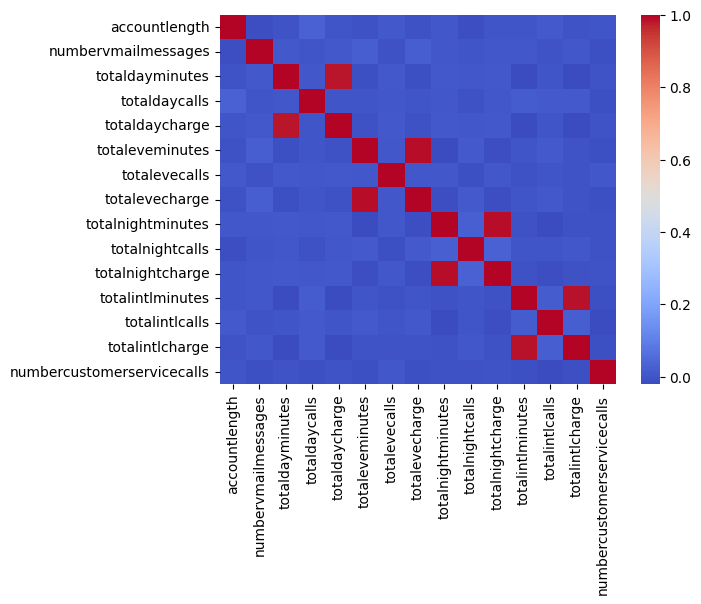

In [118]:
numerical_columns = df.select_dtypes(include=['float64']).columns
string_columns = df.select_dtypes(exclude=['float64']).columns
print(string_columns)
corr = {}

for col in string_columns:

    contingency_table = pd.crosstab(df['churn'], df[col])

    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    corr[col] = p

churn = df['churn'].map({
    'Yes': 0,
    'No' : 1
})


for col in numerical_columns:

    correlation, p = stats.pointbiserialr(df[col], churn)
    corr[col] = p

corr_matrix =  df.loc[:,numerical_columns].corr()

sns.heatmap(corr_matrix, cmap='coolwarm')


In [119]:
vars = [('totaldayminutes','totaldaycharge'),('totalevecharge','totaleveminutes'),('totalnightcharge','totalnightminutes'),('totalintlcharge','totalintlminutes')]

for var in vars:
    if corr[var[0]] < corr[var[1]]:
        df = df.drop([var[1]], axis=1)
    else : 
        df = df.drop([var[0]], axis=1)

df.describe()

,accountlength,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,numbercustomerservicecalls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.238295,7.763636,100.038788,30.629386,100.243838,17.048293,99.932929,9.015240,10.259010,4.432525,1.569091
std,39.523676,13.484979,19.745037,9.103012,19.737924,4.278942,19.839483,2.265397,2.749856,2.436181,1.298735
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,87.000000,24.495000,87.000000,14.177500,87.000000,7.520000,8.500000,3.000000,1.000000
50%,100.000000,0.000000,100.000000,30.629386,100.243838,17.048293,100.000000,9.015240,10.300000,4.000000,1.000000
75%,127.000000,16.000000,113.000000,36.690000,113.000000,19.862500,113.000000,10.520000,12.000000,6.000000,2.000000
max,243.000000,52.000000,165.000000,59.760000,170.000000,30.910000,175.000000,17.770000,20.000000,20.000000,9.000000


# Dealing with Outliers

In [120]:
numerical_columns = df.select_dtypes(include=['float64']).columns
z_scores = stats.zscore(df.loc[:,numerical_columns])
threshold = 3  # You can adjust this threshold based on your requirement

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
df = df[~outlier_indices]

# Display the DataFrame after removing outliers
print("\nDataFrame after removing outliers:")

df.describe()


DataFrame after removing outliers:


,accountlength,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,numbercustomerservicecalls
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000
mean,99.884046,7.665870,100.103374,30.698244,100.299431,17.062271,99.900938,9.013204,10.316967,4.324257,1.523403
std,39.111239,13.365991,19.443609,8.985488,19.497341,4.210502,19.463784,2.232259,2.614807,2.137486,1.204268
min,1.000000,0.000000,42.000000,4.400000,42.000000,4.500000,42.000000,2.250000,2.100000,1.000000,0.000000
25%,73.000000,0.000000,87.000000,24.555000,87.000000,14.200000,87.000000,7.520000,8.600000,3.000000,1.000000
50%,100.000000,0.000000,100.000000,30.629386,100.243838,17.050000,100.000000,9.015240,10.300000,4.000000,1.000000
75%,126.000000,15.750000,113.000000,36.720000,113.000000,19.860000,113.000000,10.520000,12.000000,6.000000,2.000000
max,217.000000,48.000000,158.000000,57.530000,159.000000,29.830000,159.000000,15.760000,18.500000,11.000000,5.000000


# Handling Categorical Data

In [121]:
df['internationalplan'] = df['internationalplan'].map({
    'yes': 0,
    'no' : 1
})

df['voicemailplan'] = df['voicemailplan'].map({
    'yes': 0,
    'no' : 1
})

# Data Scaling

In [122]:
numerical_columns = df.select_dtypes(include=['float64']).columns

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(df.loc[:,numerical_columns])
df.loc[:,numerical_columns] = minMaxScaler.transform(df.loc[:,numerical_columns])

df.describe()

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldaycalls,totaldaycharge,totalevecalls,totalevecharge,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,numbercustomerservicecalls
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000
mean,0.457797,0.905656,0.739764,0.159706,0.500891,0.494979,0.498286,0.495944,0.494880,0.500607,0.501035,0.332426,0.304681
std,0.181071,0.292337,0.438810,0.278458,0.167617,0.169123,0.166644,0.166226,0.166357,0.165230,0.159439,0.213749,0.240854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,1.000000,0.000000,0.000000,0.387931,0.379353,0.384615,0.382945,0.384615,0.390081,0.396341,0.200000,0.200000
50%,0.458333,1.000000,1.000000,0.000000,0.500000,0.493683,0.497811,0.495460,0.495726,0.500758,0.500000,0.300000,0.200000
75%,0.578704,1.000000,1.000000,0.328125,0.612069,0.608319,0.606838,0.606396,0.606838,0.612139,0.603659,0.500000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
df.to_csv('../clean_data.csv', index=False)

# Data Splitting

In [124]:
numerical_columns = df.select_dtypes(include=['float64']).columns

x = df[numerical_columns]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handling Imbalanced Data

In [125]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Apply RandomUnderSampler to address class imbalance
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Display class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution after oversampling:
churn
No     3281
Yes    3281
Name: count, dtype: int64

Class distribution after undersampling:
churn
No     509
Yes    509
Name: count, dtype: int64
